HW6 AMATH581 Olaiyan Alolaiyan

In [1]:
import numpy as np
from numpy.fft import fft2, ifft2, fftfreq
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def sech(x):
    return 1 / np.cosh(x)

def tanh(x):
    return np.sinh(x) / np.cosh(x)

In [3]:
# Parameters
beta = 1.0
D1 = 0.1
D2 = 0.1
m = 1  
t_span = [0, 4] 
t_eval = np.arange(0, 4.5, 0.5) 

# Spatial domain
n = 64
L = 20.0  
x = np.linspace(-L/2, L/2, n, endpoint=False)
y = x
dx = x[1] - x[0]
X, Y = np.meshgrid(x, y)
N = n * n 


In [4]:
# Initial conditions in spatial domain
A = np.sqrt(X**2 + Y**2)
Theta = m * np.angle(X + 1j * Y) - A
u0 = np.tanh(A) * np.cos(Theta)
v0 = np.tanh(A) * np.sin(Theta)

# Fourier transform
u0_hat = fft2(u0)
v0_hat = fft2(v0)

# Stack Fourier coefficients
U0_hat = np.hstack((u0_hat.flatten(), v0_hat.flatten()))


In [5]:
kx = fftfreq(n, d=dx/(2*np.pi))
ky = fftfreq(n, d=dx/(2*np.pi))
KX, KY = np.meshgrid(kx, ky)
K2 = (KX)**2 + (KY)**2
A = -K2

In [6]:
def odefunc_fft(t, Uvec_hat):
   
    u_hat = Uvec_hat[:N].reshape((n, n))
    v_hat = Uvec_hat[N:].reshape((n, n))
    
    u = ifft2(u_hat)
    v = ifft2(v_hat)
    
    A2 = np.abs(u)**2 + np.abs(v)**2
    
    lam = 1 - A2
    omega = -beta * A2
    
    ut = lam * u - omega * v
    vt = omega * u + lam * v
    
    ut_hat = fft2(ut)
    vt_hat = fft2(vt)
    
    ut_hat = ut_hat + D1 * (A * u_hat)
    vt_hat = vt_hat + D2 * (A * v_hat)
  
    dUdt_hat = np.hstack((ut_hat.flatten(), vt_hat.flatten()))
    return dUdt_hat


In [7]:
sol = solve_ivp(fun=odefunc_fft, t_span=t_span, y0=U0_hat, t_eval=t_eval, method='RK45', vectorized=False)

# Extract the solution
A1_complex = sol.y  

# Verify the shape
print("Shape of A1_complex:", A1_complex.shape)  


Shape of A1_complex: (8192, 9)


In [8]:
num_vars = 2 * N  

# assert A1_complex.shape == (num_vars, len(t_eval))

A1 = A1_complex  

print(A1)

[[ 24.94003847+0.00000000e+00j  12.73268299+1.83655624e-15j
   -1.38095598+5.22765542e-15j ... -64.02389647-8.36974796e-15j
  -67.76356741-1.47038510e-14j -61.18058974-1.37803792e-14j]
 [-18.55666362-5.81663109e+01j -42.51586944-4.69129224e+01j
  -60.80795253-2.57480390e+01j ... -26.39439597+1.13082890e+02j
    6.86544434+1.23000456e+02j  41.4436393 +1.10055312e+02j]
 [-16.04755868+3.28279829e+01j -22.03971648-4.57977740e+01j
  -23.23089505-1.04141716e+02j ... -25.03391682-9.26527314e+01j
  -29.2936105 -4.09594873e+01j -31.3712619 +1.56986891e+01j]
 ...
 [ 24.73021466-5.66774723e+02j  34.94179045-3.31372917e+02j
   38.82924248-4.97842318e+01j ...   4.99619196+6.02396295e+02j
   -9.93322885+4.90736906e+02j -25.6299042 +2.81792021e+02j]
 [ 25.33720124-3.61633792e+02j  43.00958768-4.53711746e+02j
   51.93221654-4.47841562e+02j ... -30.76392977+2.66442187e+02j
  -58.45411318+4.29165358e+02j -74.0191717 +5.05315322e+02j]
 [ -6.4753501 +3.96245454e+01j  15.86720969-5.83358549e+01j
   37.7389

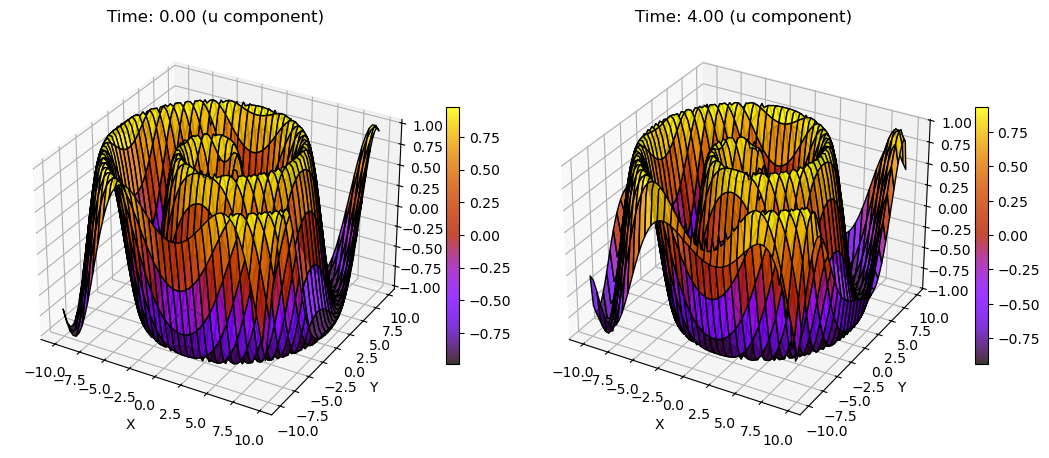

In [9]:

u_sol = A1_complex[:N, :]
u_sol_spatial = [np.real(ifft2(u_sol[:, i].reshape((n, n)))) for i in range(len(t_span))]

# Plotting in 3D for u
fig = plt.figure(figsize=(16, 16))
for j, t in enumerate(t_span):
    ax = fig.add_subplot(3, 3, j + 1, projection='3d')
    surf = ax.plot_surface(X, Y, u_sol_spatial[j], cmap='gnuplot', edgecolor='k', alpha=0.8)
    ax.set_title(f'Time: {t:.2f} (u component)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u Amplitude')
    fig.colorbar(surf, ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/amath581hwenv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


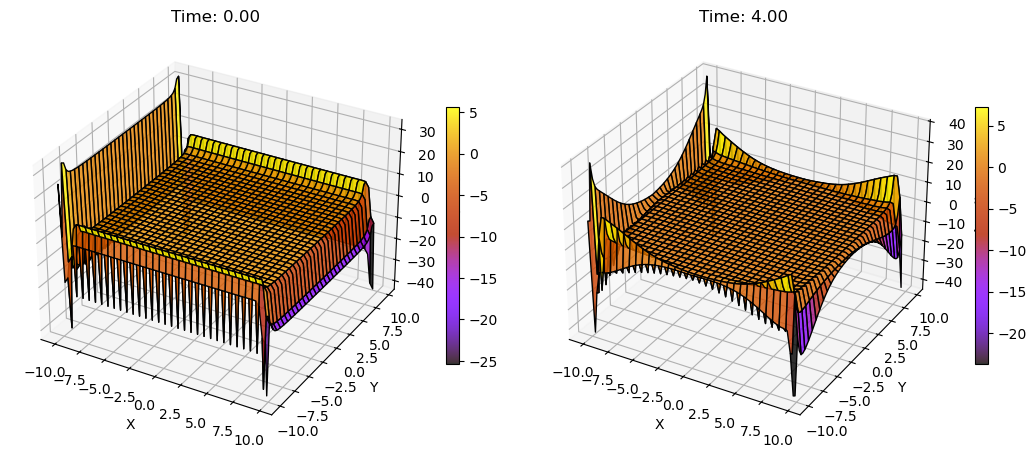

In [10]:
fig = plt.figure(figsize=(16, 16))
for j, t in enumerate(t_span):
    ax = fig.add_subplot(3, 3, j + 1, projection='3d')
    wtc = A1[0:N, j].reshape((n, n))
    wtc = np.nan_to_num(wtc)
    surf = ax.plot_surface(X, Y, wtc, cmap='gnuplot', edgecolor='k', alpha=0.8)
    ax.set_title(f'Time: {t:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Amplitude')
    fig.colorbar(surf, ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

In [11]:
from numpy import *
from scipy.linalg import kron

def odefunc_cheby(N):
    if N == 0: 
        D = 0.
        x = 1.
    else:
        n = arange(0, N + 1)
        x = cos(pi * n / N).reshape(N + 1, 1)
        c = (hstack(([2.], ones(N - 1), [2.])) * (-1)**n).reshape(N + 1, 1)
        X = tile(x, (1, N + 1))
        dX = X - X.T
        D = dot(c, 1. / c.T) / (dX + eye(N + 1))
        D -= diag(sum(D.T, axis=0))
    return D, x.reshape(N + 1)


In [12]:
# Define parameters
N = 30
D, x = odefunc_cheby(N)

D[N, :] = 0  
D[0, :] = 0  

Dxx = (np.dot(D, D)) / ((20 / 2)**2)
y = x
x, y = np.meshgrid(x, y)
x = x * (20 / 2)  
y = y * (20 / 2)  

# 2D Laplacian using Kronecker product
I = np.eye(len(Dxx))
L = kron(I, Dxx) + kron(Dxx, I)
N2 = (N + 1) * (N + 1)


In [13]:
m = 1  
B = np.sqrt(x**2 + y**2)
Theta = m * np.angle(x + 1j * y) - B
u = np.tanh(B) * np.cos(Theta)
v = np.tanh(B) * np.sin(Theta)
uv0 = np.hstack([u.flatten(), v.flatten()])


In [14]:
def RD_2D(t, uv):
   
    u = uv[:N2]
    v = uv[N2:]

    A2 = u**2 + v**2
    lam = 1 - A2
    omega = -A2

    rhs_u = D1 * np.dot(L, u) + lam * u - omega * v
    rhs_v = D2 * np.dot(L, v) + omega * u + lam * v

    rhs = np.hstack([rhs_u, rhs_v])
    return rhs


In [15]:
# Define additional parameters
D1, D2 = 0.1, 0.1  
t_span = [0, 4]
t_eval = np.linspace(0, 4, 9)

# Solve the system
sol = solve_ivp(fun=RD_2D, t_span=t_span, y0=uv0, t_eval=t_eval, method='RK45', vectorized=False)

# Reshape and verify the solution
A2 = sol.y
print("Shape of A2:", A2.shape) 

print(A2)

Shape of A2: (1922, 9)
[[ 0.70358468  0.27678435 -0.21775865 ... -0.79689015 -0.40972859
   0.07776933]
 [ 0.73241275  0.47188952  0.07344742 ... -0.96577657 -0.78500366
  -0.4261521 ]
 [ 0.81058026  0.37605887 -0.11123233 ... -0.84008598 -0.49565779
  -0.03085913]
 ...
 [ 0.58562756  0.91352592  0.97914313 ... -0.50294695 -0.84298442
  -0.97634716]
 [ 0.6808609   0.87018536  0.97997159 ... -0.16453512 -0.5878894
  -0.88455009]
 [ 0.71061143  0.96093661  0.97601586 ... -0.60413504 -0.91222169
  -0.99697897]]
